# Demo notebook for approximative MOT algorithms
https://github.com/jvlindheim/mot

In [1]:
from imageio import imread
import os
from mot import *

## Custom shapes data set

In [2]:
filenames = os.listdir('images')
imgs = [np.array(imread(os.path.join('images', filename)))[:, :, 0] for filename in filenames]
imgs = np.array([img / img.sum() for img in imgs])
n_imgs, ny, nx = imgs.shape

In [3]:
xx, yy = np.meshgrid(np.arange(nx), np.arange(ny), indexing='xy')
posns = np.stack([xx.flatten(), ny-yy.flatten()], axis=1) / max(nx, ny)
masses = [img.flatten() for img in imgs]
masses = [mass/mass.sum() for mass in masses]

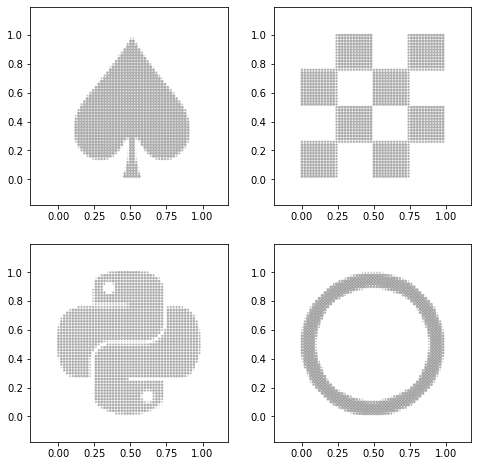

In [4]:
scatter_distr(posns, masses)

## Equal weight barycenter computation

### Reference algorithm

In [5]:
ref_posns, ref_masses = bary_ref(posns, masses)

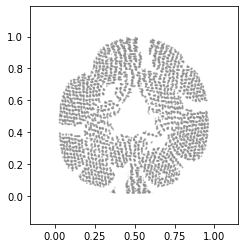

In [6]:
scatter_distr(ref_posns, ref_masses)

### Greedy algorithm

In [7]:
greedy_posns, greedy_masses = bary_greedy(posns, masses)

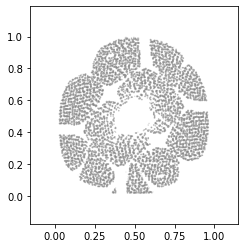

In [8]:
scatter_distr(greedy_posns, greedy_masses)

## Barycenter computation for multiple different sets of weights

In [9]:
n_intermediate = 4
n_on_axis = n_intermediate + 2

In [10]:
w = np.linspace(0, 1, n_on_axis)
bilinear_weight_sets = np.stack([
    (1-w[:, None])*(1-w[None, :]),
    (1-w[:, None])*w[None, :],
    w[:, None]*(1-w[None, :]),
    w[:, None]*w[None, :]
], axis=0).transpose((1, 2, 0)).reshape(-1, 4)

### Reference algorithm

In [11]:
tuples_ref, masses_ref = tuples_reference(posns, masses)

In [12]:
barys_ar_ref = [
    bary_from_ref_tuples(tuples_ref, masses_ref, posns, masses, w) for w in bilinear_weight_sets
]
barys_mass_ar_ref = [masses_ref]*len(bilinear_weight_sets)

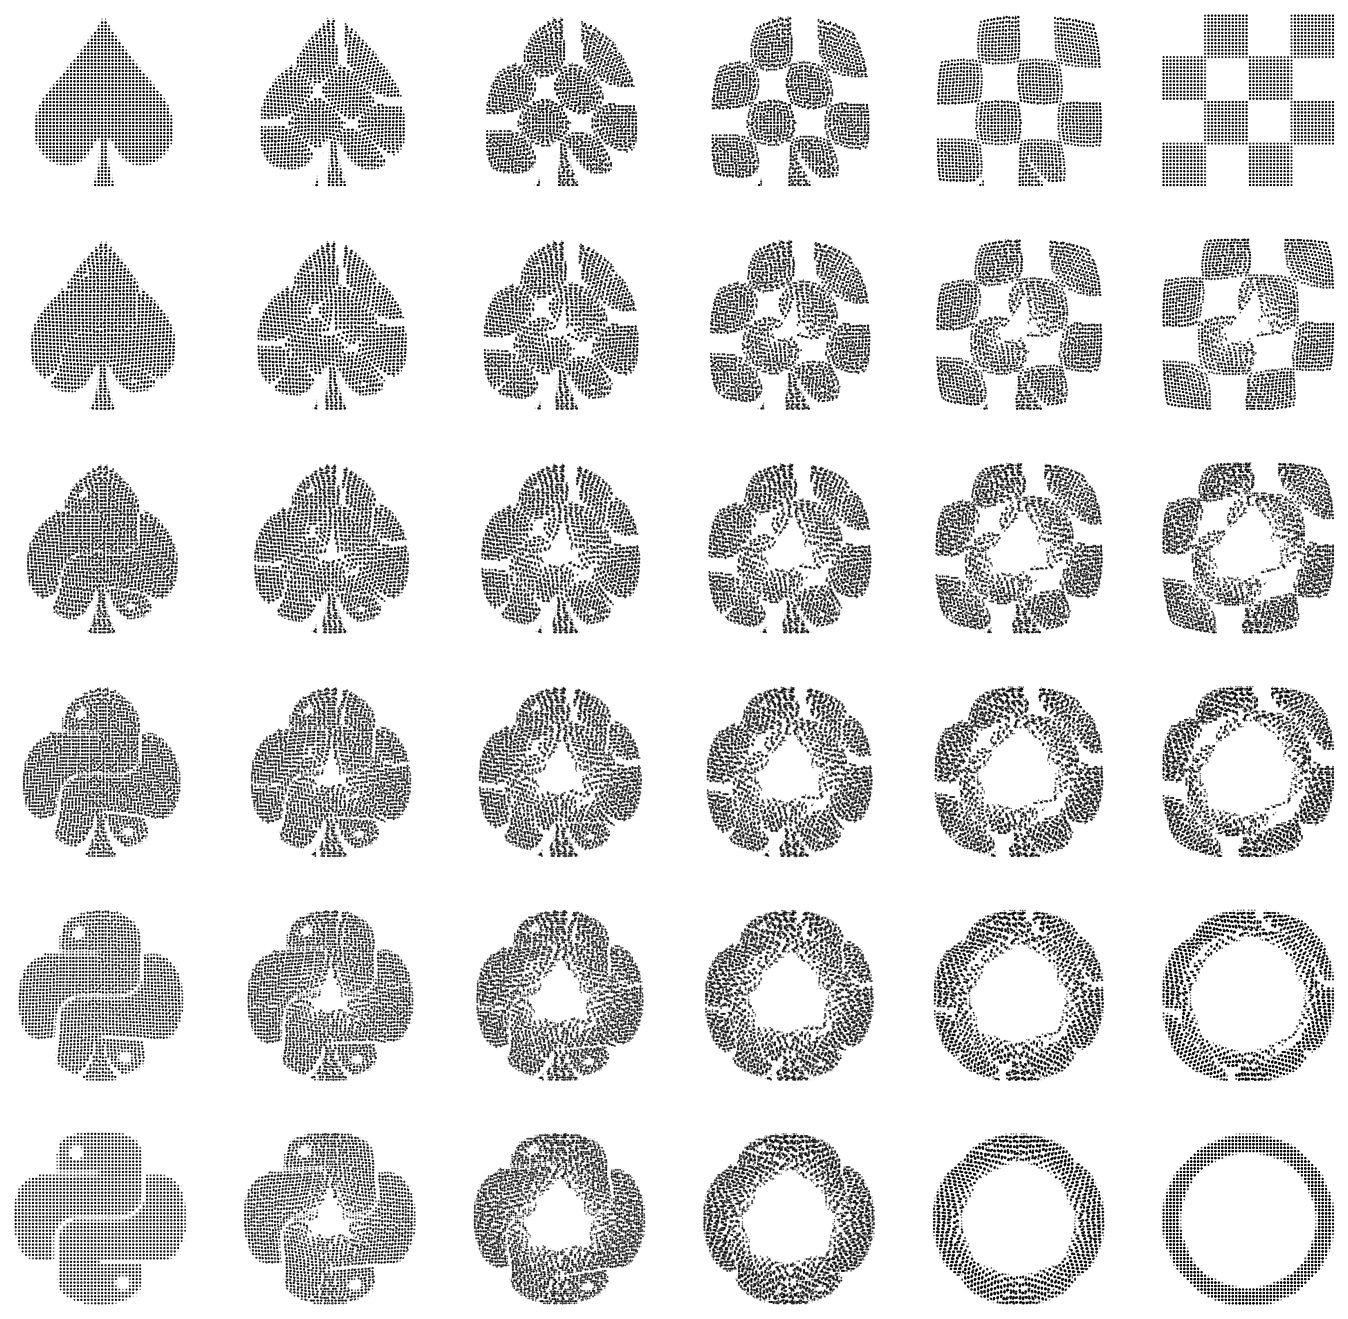

In [13]:
savepath = None
scatter_distr(barys_ar_ref, barys_mass_ar_ref, n_plots_per_row=n_on_axis,
              alpha=0.6, color='black', axis_off=True, margin_fac=0.05,
              dpi=100, savepath=savepath)

### Greedy algorithm, only one equally weighted MOT computation

In [14]:
plans_greedy_one, masses_greedy_one = plans_greedy(posns, masses)

In [15]:
barys_ar_greedy_one = [
    bary_from_greedy_plans(plans_greedy_one, masses_greedy_one, posns, masses, w) for w in bilinear_weight_sets
]
barys_pos_ar_greedy_one = [bary[0] for bary in barys_ar_greedy_one]
barys_mass_ar_greedy_one = [bary[1] for bary in barys_ar_greedy_one]

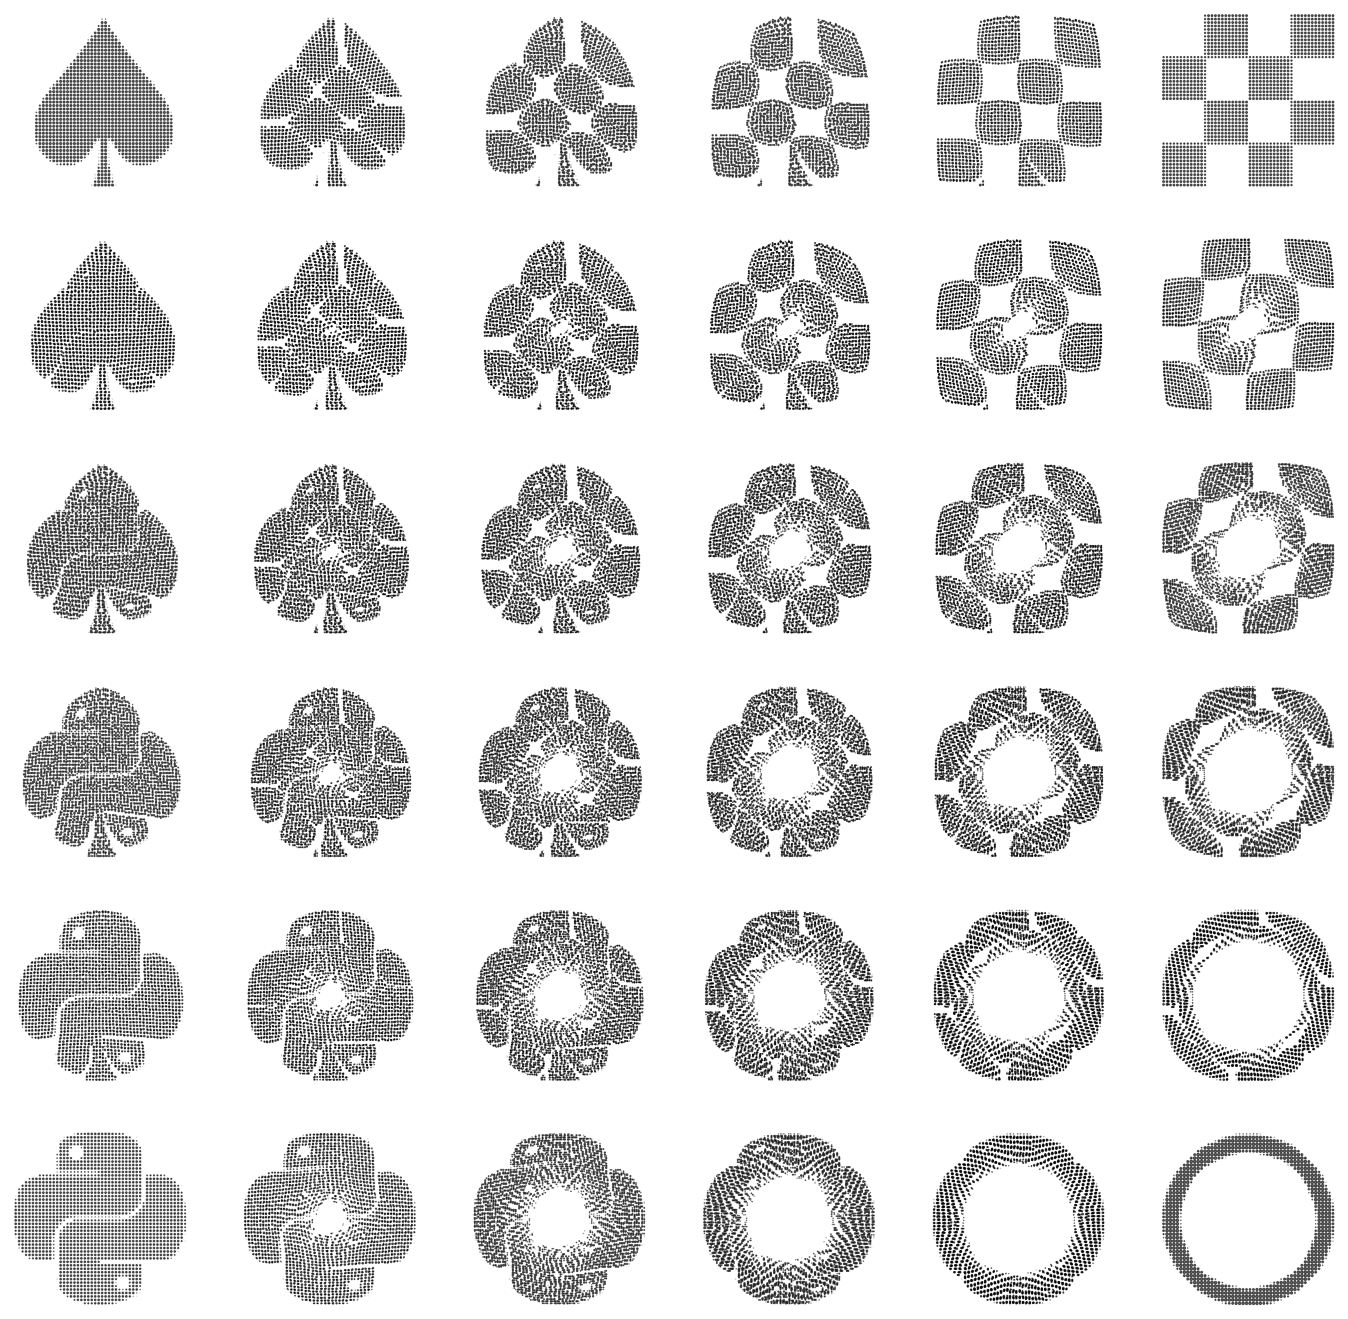

In [16]:
savepath = None
scatter_distr(barys_pos_ar_greedy_one, barys_mass_ar_greedy_one, n_plots_per_row=n_on_axis,
              alpha=0.6, color='black', axis_off=True, margin_fac=0.05,
              dpi=100, savepath=savepath)

### Greedy algorithm, multiple MOT computations (slow, but most accurate)

In [17]:
barys_ar_greedy_multiple = [
    bary_greedy(posns, masses, weights=w) for w in bilinear_weight_sets
]

In [18]:
barys_pos_ar_greedy_multiple = [bary[0] for bary in barys_ar_greedy_multiple]
barys_mass_ar_greedy_multiple = [bary[1] for bary in barys_ar_greedy_multiple]

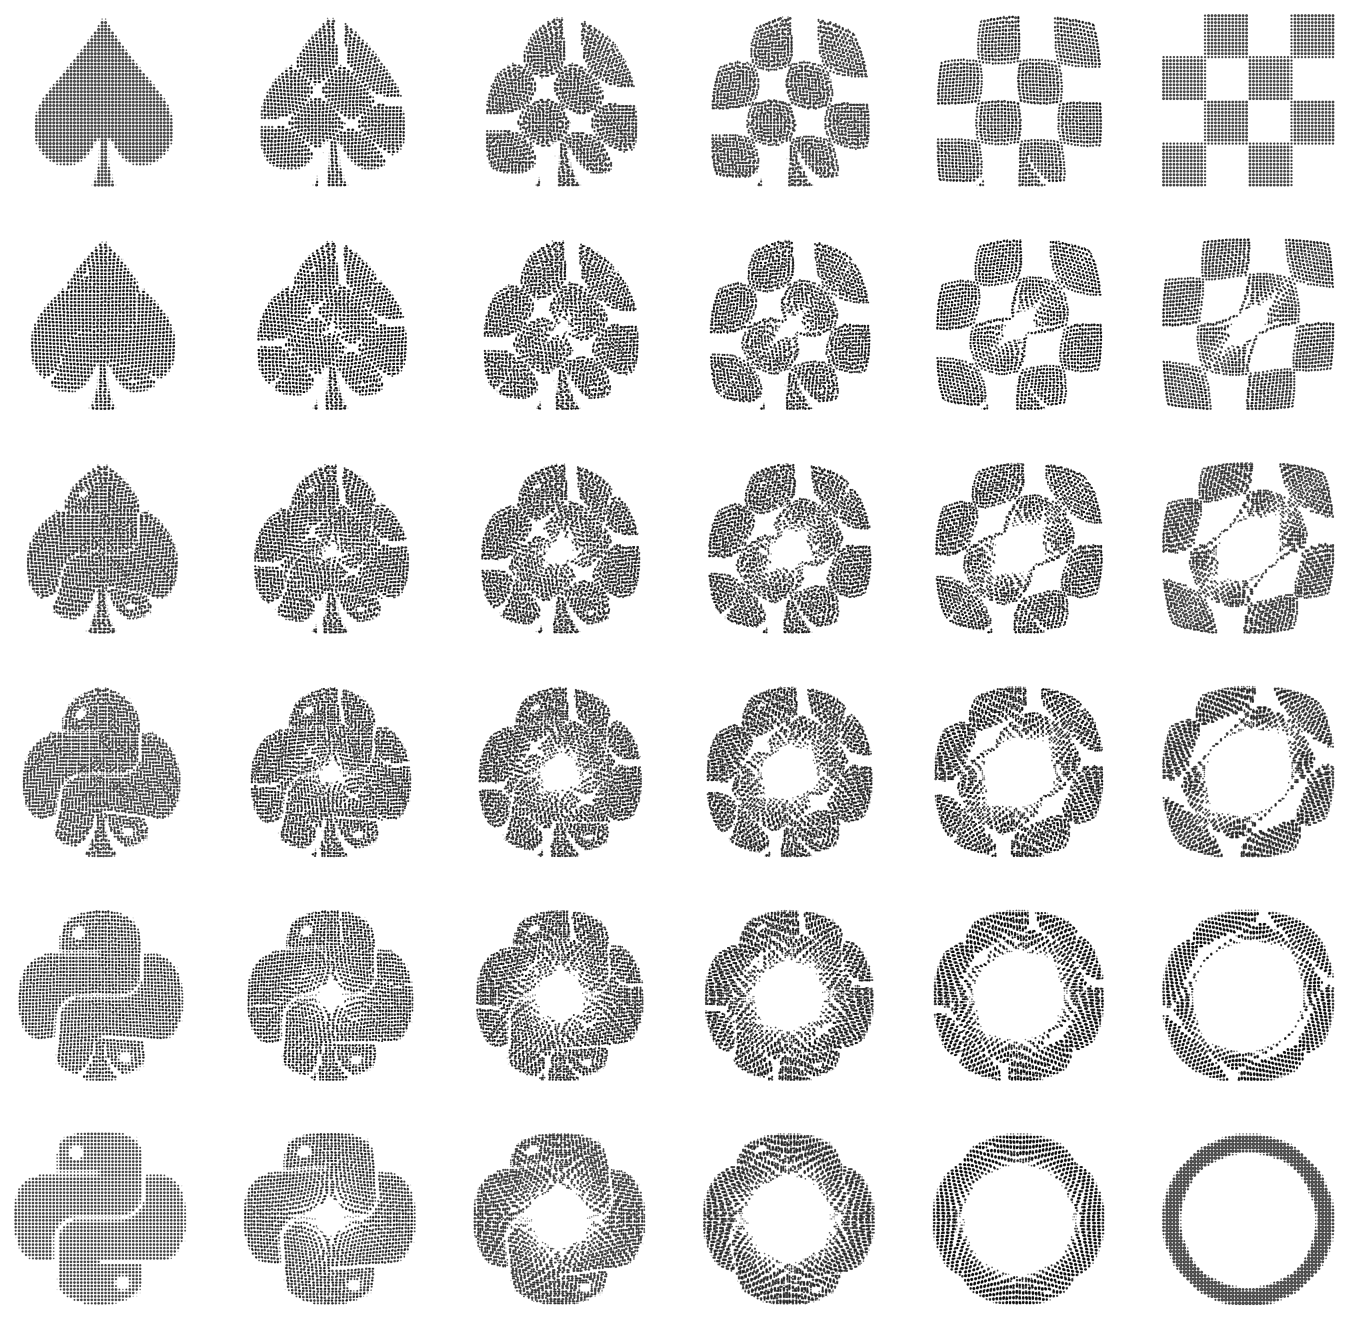

In [19]:
savepath = None
scatter_distr(barys_pos_ar_greedy_multiple, barys_mass_ar_greedy_multiple,
              n_plots_per_row=n_on_axis, alpha=0.6, color='black',
              axis_off=True, margin_fac=0.05, dpi=100, savepath=savepath)

## Ellipses data set
Code for generating ellipses is taken from:

https://github.com/hichamjanati/debiased-ot-barycenters
Code repository of (Janati et al, 2020, Debiased Sinkhorn barycenters)

In [20]:
from make_ellipse import make_nested_ellipses

In [21]:
seed = 42
n_samples = 10
width = 60
n_features = width ** 2
ellipses = make_nested_ellipses(width, n_samples, seed=seed)
ellipses /= ellipses.sum((1, 2))[:, None, None]
n_imgs, ny, nx = ellipses.shape

In [22]:
xx, yy = np.meshgrid(np.arange(nx), np.arange(ny), indexing='xy')
posns = np.stack([xx.flatten(), ny-yy.flatten()], axis=1) / max(nx, ny)
masses = [img.flatten() for img in ellipses]
masses = [mass/mass.sum() for mass in masses]

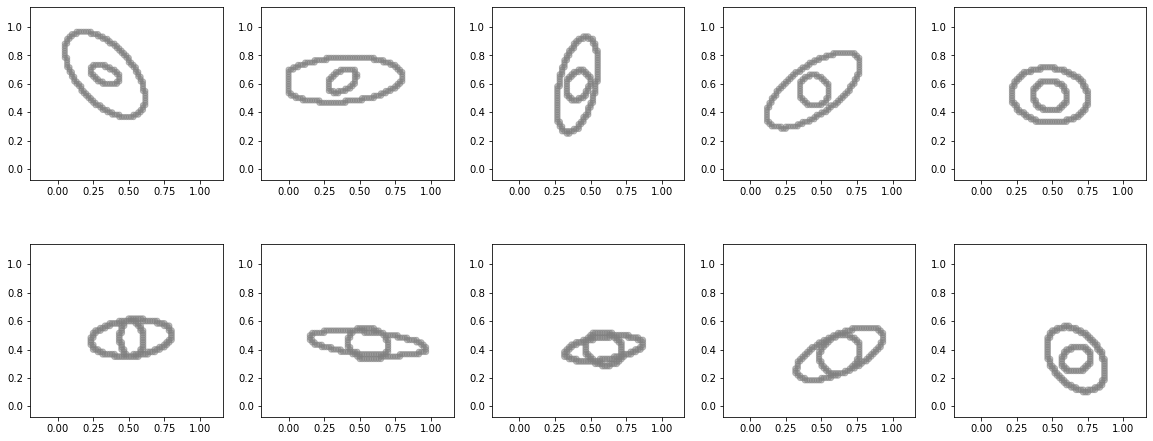

In [23]:
scatter_distr(posns, masses, n_plots_per_row=5)

In [24]:
bary_pos, bary_mass = bary_greedy(posns, masses)

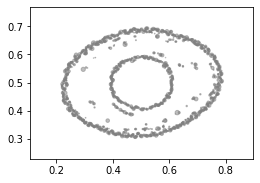

In [25]:
scatter_distr(bary_pos, bary_mass, n_plots_per_row=5)